In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
os.chdir("..")

os.chdir('/Users/kuldeepchinwan/Projects/ML_Projects/Gurugram_house_Prediction/Data')

current_path = os.getcwd()

In [5]:
current_path

'/Users/kuldeepchinwan/Projects/ML_Projects/Gurugram_house_Prediction/Data'

In [6]:
house_df = pd.read_csv('housing_clean.csv')

In [7]:
house_df.columns

Index(['Unnamed: 0', 'bedRoom', 'bathroom', 'noOfFloor', 'price', 'area_value',
       'area_type', 'balcony_count', 'agePossession_numeric',
       'Environment_Rating', 'Lifestyle_Rating', 'Safety_Rating',
       'Connectivity_Rating'],
      dtype='object')

In [8]:
# Define predictors (features) and target variable
X = house_df[['bedRoom', 'bathroom', 'noOfFloor', 'area_value', 'balcony_count',
        'agePossession_numeric', 'Environment_Rating', 'Lifestyle_Rating',
        'Safety_Rating', 'Connectivity_Rating']]  

y = house_df['price']

In [9]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(f"Training Data Size: {X_train.shape}")
print(f"Testing Data Size: {X_test.shape}")

Training Data Size: (341, 10)
Testing Data Size: (169, 10)


In [11]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients and intercept
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
intercept = model.intercept_

print("Intercept:", intercept)
print("\nCoefficients:\n", coefficients) 


Intercept: -9.60176308209669

Coefficients:
                        Coefficient
bedRoom                  -0.327394
bathroom                  0.559277
noOfFloor                -0.045308
area_value                0.016716
balcony_count             0.631813
agePossession_numeric    -0.019322
Environment_Rating       -0.522751
Lifestyle_Rating          0.754430
Safety_Rating             1.217711
Connectivity_Rating       0.538828


In [12]:
# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Evaluating model 

1. A. Mean Squared Error (MSE)

In [13]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.2f}")
print(f"Testing MSE: {mse_test:.2f}")


Training MSE: 4.67
Testing MSE: 6.18


2️⃣ Mean Squared Error (MSE) Interpretation
MSE measures the average squared difference between actual and predicted values.
Lower MSE indicates better performance, but it depends on the scale of the target variable (price).
📌 Real Estate Prediction: Since prices can be in lakhs/crores, MSE values will be large. Instead of MSE, consider Root Mean Squared Error (RMSE) (which is in the same unit as the target variable):

 
RMSE Value (in INR)	Interpretation

< 10% of avg price	Very Good 🚀

10-20% of avg price	Acceptable 👍

> 20% of avg price	Needs Improvement ❌


2. B. R-squared (R²)

In [14]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training R²: {r2_train:.2f}")
print(f"Testing R²: {r2_test:.2f}")


Training R²: 0.62
Testing R²: 0.51


1️⃣ R² Score Interpretation

R² (Coefficient of Determination) tells how well your model explains the variance in the target variable.

Range: 0 to 1 (sometimes negative if the model is worse than a simple mean-based prediction).

R² Value	Interpretation

~0.90 - 1.0	Excellent fit 🚀 (Model explains most of the variance)

~0.75 - 0.89	Good fit 👍 (Model captures strong trends)

~0.50 - 0.74	Moderate fit 🤔 (Acceptable but needs improvement)

< 0.50	Poor fit ❌ (Model struggles to explain variance)

📌 Real Estate Prediction: Since house prices depend on multiple external factors 
(e.g., market demand, location trends), 
achieving R² ≥ 0.75 is considered good, but in some cases, even 0.65+ is reasonable.

****Visualize Predictions****

A. Actual vs. Predicted Prices

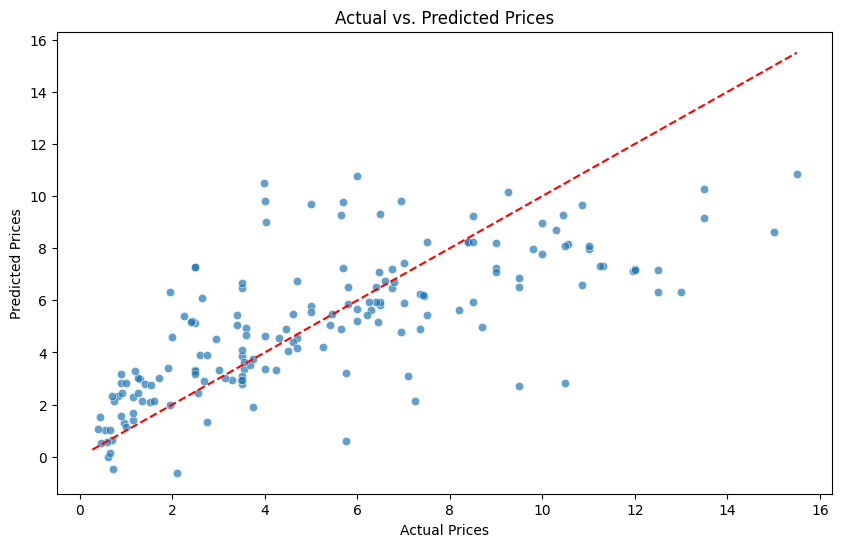

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Diagonal line
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()

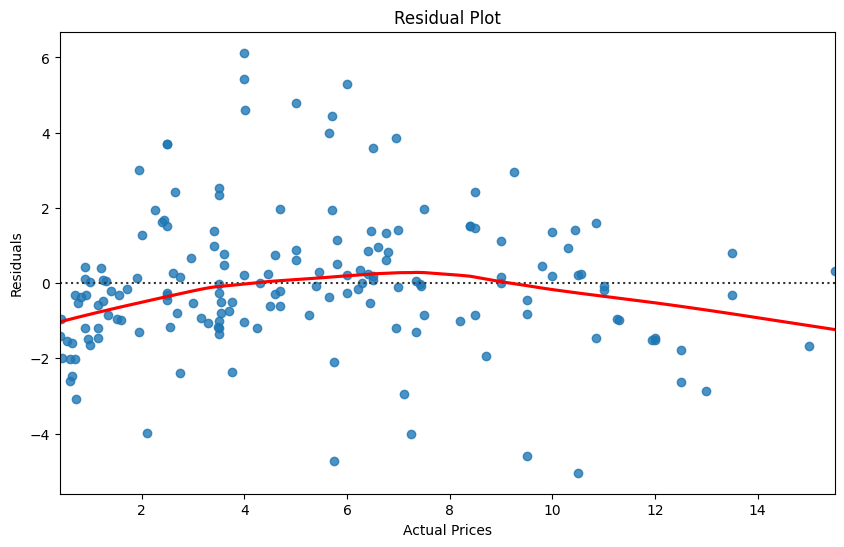

In [16]:
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_test_pred, lowess=True, line_kws={'color': 'red'})
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()